In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data cleaning and pre-processing

In [ ]:
data = pd.read_csv("./spotify_songs.csv", encoding='latin-1')
data.tail(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [ ]:
data.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
# drop the irrelevant columns
data.drop(['track_id', 'track_name', 'track_artist', 'track_album_id',
           'track_album_name', "track_album_release_date", "playlist_name", "playlist_id",
           "playlist_genre", "playlist_subgenre"], inplace=True, axis=1)

In [ ]:
# Display the current updated information for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   danceability      32833 non-null  float64
 2   energy            32833 non-null  float64
 3   key               32833 non-null  int64  
 4   loudness          32833 non-null  float64
 5   mode              32833 non-null  int64  
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 3.3 MB


# Exploratory Data Analysis

In [ ]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


array([[<Axes: title={'center': 'track_popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

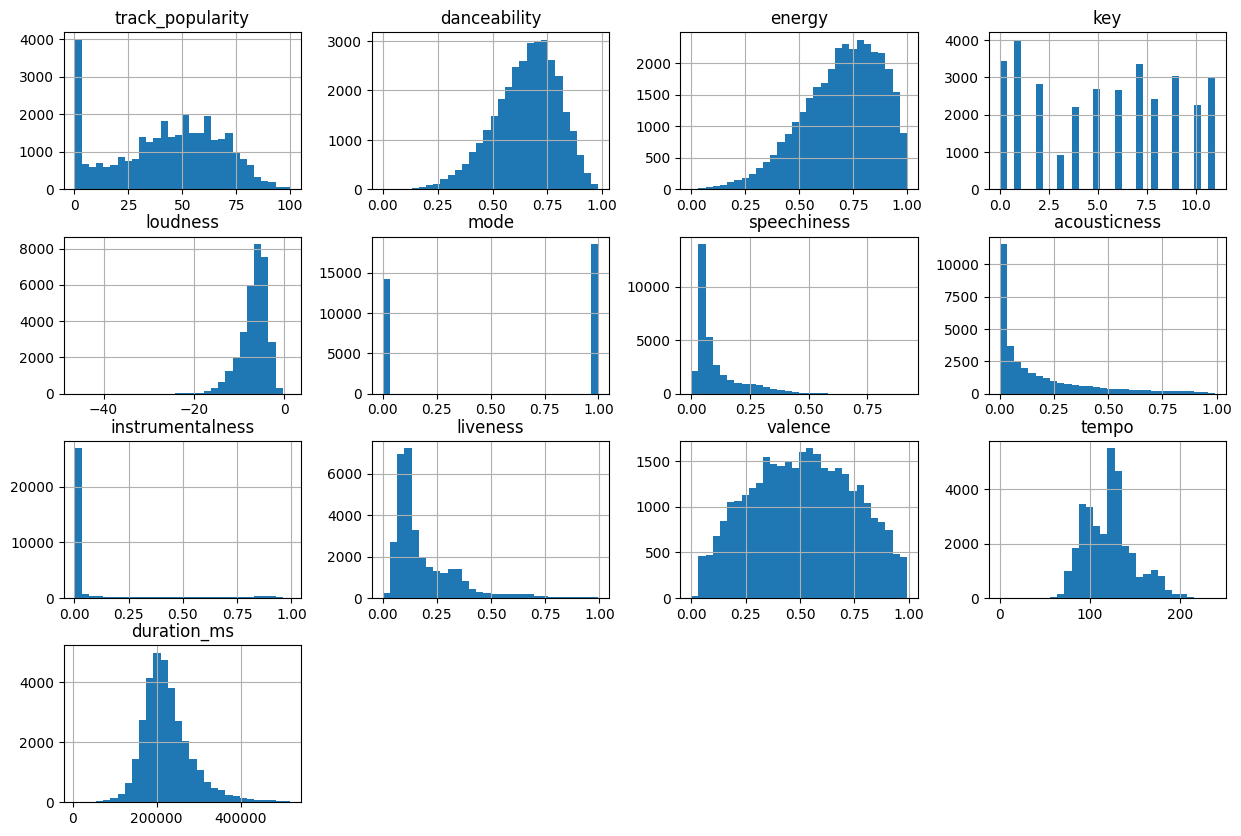

In [ ]:
data.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'track_popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

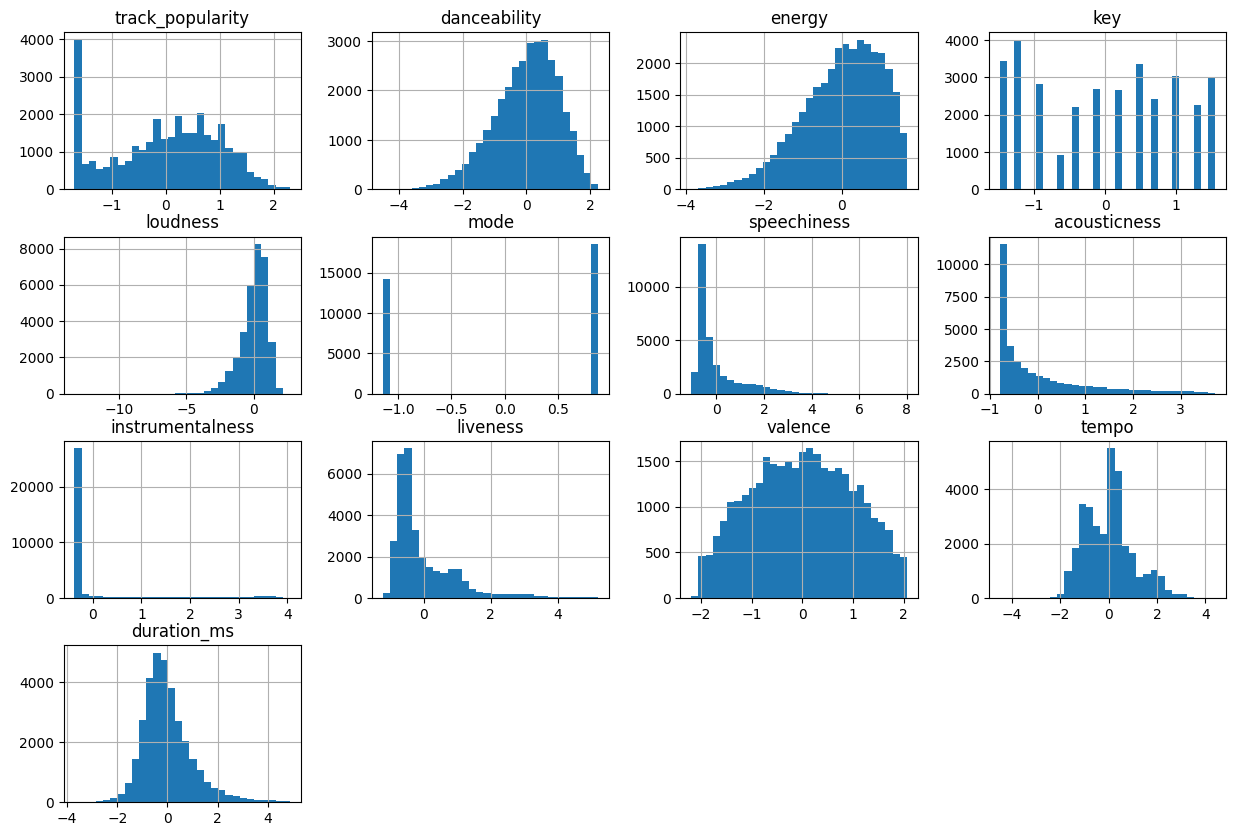

In [ ]:
# Standardize the columns
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

scaled_df.hist(bins=30, figsize=(15, 10))

In [ ]:
print("Mean after scaling:", data.mean(axis=0))
print("Standard deviation after scaling:", data.std(axis=0))

Mean after scaling: track_popularity        42.477081
danceability             0.654850
energy                   0.698619
key                      5.374471
loudness                -6.719499
mode                     0.565711
speechiness              0.107068
acousticness             0.175334
instrumentalness         0.084747
liveness                 0.190176
valence                  0.510561
tempo                  120.881132
duration_ms         225799.811622
dtype: float64
Standard deviation after scaling: track_popularity       24.984074
danceability            0.145085
energy                  0.180910
key                     3.611657
loudness                2.988436
mode                    0.495671
speechiness             0.101314
acousticness            0.219633
instrumentalness        0.224230
liveness                0.154317
valence                 0.233146
tempo                  26.903624
duration_ms         59834.006182
dtype: float64


In [ ]:
print("Mean after scaling:", scaled_df.mean(axis=0))
print("Standard deviation after scaling:", scaled_df.std(axis=0))

Mean after scaling: track_popularity   -1.406672e-16
danceability        1.385031e-16
energy              4.031740e-16
key                -8.330477e-17
loudness            1.449955e-17
mode               -6.248872e-17
speechiness        -1.182687e-16
acousticness        4.371505e-17
instrumentalness   -7.871956e-17
liveness            1.231650e-16
valence             1.579801e-16
tempo               1.688007e-17
duration_ms         1.776736e-16
dtype: float64
Standard deviation after scaling: track_popularity    1.000015
danceability        1.000015
energy              1.000015
key                 1.000015
loudness            1.000015
mode                1.000015
speechiness         1.000015
acousticness        1.000015
instrumentalness    1.000015
liveness            1.000015
valence             1.000015
tempo               1.000015
duration_ms         1.000015
dtype: float64


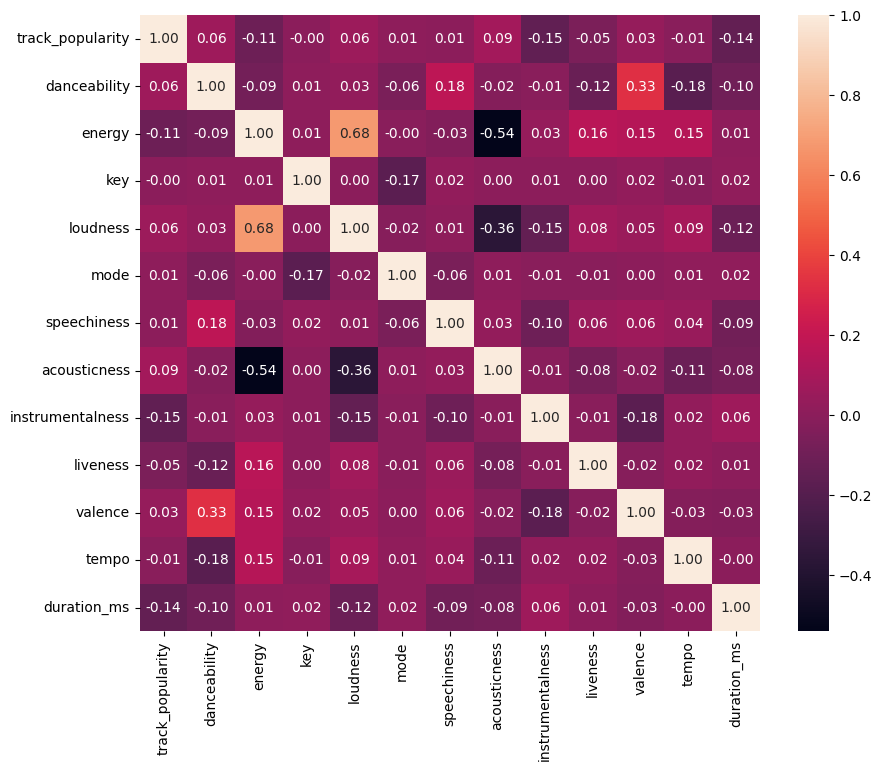

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# plotting a correlation matrix
corr = scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Feature Selection

Now we start to build the prediction model for the `track_popularity`. First, we split the data and apply feature selection.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = scaled_df.drop(['track_popularity'], axis = 1)
y = scaled_df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Feature Selection using Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward', scoring='r2', cv=5)
# Fit the SFS to the training data
sfs.fit(X_train, y_train)

# Get the boolean mask of the selected features
selected_features_mask = sfs.get_support()

# Get the names of the selected features from the mask
selected_features = X_train.columns[selected_features_mask]
print("Selected Features:", selected_features)

Selected Features: Index(['energy', 'loudness', 'instrumentalness', 'valence', 'duration_ms'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

select_k_best = SelectKBest(f_regression, k=10)

select_k_best.fit(X_train, y_train)

X_train_selected = select_k_best.transform(X_train)
X_test_selected = select_k_best.transform(X_test)

# Selected features can also be identified using get_support
selected_features_skb = X_train.columns[select_k_best.get_support()]
print("Selected features using SelectKBest:", selected_features_skb)

Selected features using SelectKBest: Index(['danceability', 'energy', 'loudness', 'mode', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [ ]:
scores = select_k_best.scores_  # Get the scores assigned to each feature
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': scores})

# Sort by score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores_sorted)

             Feature       Score
7   instrumentalness  605.813039
11       duration_ms  558.910416
1             energy  329.220488
6       acousticness  204.100264
0       danceability  110.131636
3           loudness   83.227249
8           liveness   76.394001
9            valence   24.222308
4               mode    5.942925
10             tempo    1.585053
5        speechiness    0.987433
2                key    0.649488


# Prediction Modeling

After selected the relevant features, we move to the first objective which is to do the prediction modeling.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

top_features = ['instrumentalness', 'duration_ms', 'energy', 'acousticness', 'danceability', 'loudness', 'liveness'] # select scores larger than 50

model = LinearRegression()
model.fit(X_train[top_features], y_train)
y_pred = model.predict(X_test[top_features])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.9259639440676954
Root Mean Squared Error: 0.9622702032525456
R^2 Score: 0.06918293687945387


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Might need to fine tune

rf_model.fit(X_train[top_features], y_train)

y_pred = rf_model.predict(X_test[top_features])

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.7212267861055812
Root Mean Squared Error: 0.8492507204033337
R^2 Score: 0.2749931536885115


In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train[top_features], y_train)

y_pred = dt_model.predict(X_test[top_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1.3358311346195337
Root Mean Squared Error: 1.1557816119923061
R^2 Score: -0.3428324304824526


## Classification Modeling

Since the result above is not promising because it would be hard to predict the exact popularity. We simplify it as a categorization problem

In [ ]:
# Convert and create a new variable to categorize whether a song is popular
scaled_df['popularity_category'] = (scaled_df['track_popularity'] > 1).astype(int)
scaled_df

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_category
0,0.941531,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874,0
1,0.981557,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268,0
2,1.101635,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017,1
3,0.701374,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750,0
4,1.061609,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,-0.019096,-1.563583,1.234780,-0.934342,1.641519,0.876177,-0.132936,-0.449547,-0.377953,-0.799509,-1.289173,0.270929,-0.358076,0
32829,-0.899670,-0.915679,0.483014,-1.488113,0.755423,0.876177,-0.642251,-0.790531,-0.358910,1.197705,-0.474221,0.266134,2.127922,0
32830,-1.139827,-0.867431,0.676483,0.173200,0.609190,-1.141322,-0.582041,-0.306579,-0.377948,-0.260352,-0.319809,0.264201,-0.262193,0
32831,-1.099801,-0.198848,1.046839,-0.934342,1.123849,0.876177,0.019069,-0.762256,0.188438,0.990337,-0.868829,0.264908,2.367121,0


In [ ]:
X = scaled_df.drop(['popularity_category'], axis = 1)
y = scaled_df['popularity_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

top_features = ['instrumentalness', 'duration_ms', 'energy', 'acousticness', 'danceability', 'loudness', 'liveness']

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train[top_features], y_train)

y_pred = classifier.predict(X_test[top_features])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9252322217146338
Precision: 0.9141689373297003
Recall: 0.6105550500454959
F1 Score: 0.7321331151118387
ROC AUC Score: 0.799516734971541


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train[top_features], y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test[top_features])

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))

Accuracy: 0.8326480889294959
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train[top_features], y_train)

y_pred_nb = nb.predict(X_test[top_features])

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))

Accuracy: 0.7198111770976092
Precision: 0.2854661262304574
Recall: 0.44858962693357596
F1 Score: 0.3489030431705591


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train[top_features], y_train)

y_pred_dt = dt.predict(X_test[top_features])

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.8468098066088016
Precision: 0.5341159207630227
Recall: 0.6624203821656051
F1 Score: 0.5913891145410235
